Name: Avani Gupta <br>
Roll: 2019121004

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_distances
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from tqdm import tqdm
os.environ['TOKENIZERS_PARALLELISM'] = '0'
from scipy import stats

In [2]:
def metric_2v2(y_true, y_pred):
    cs_dist = cosine_distances(y_true, y_pred)
    value = 0
    for i in range(0, len(y_true)-1):
        for j in range(i+1, len(y_true)):
            a = cs_dist[i, i]+cs_dist[j,j]
            b = cs_dist[i,j]+cs_dist[j,i]
            if (a<b):
                value += 1  
    value /= (len(y_true)*(len(y_true)-1)/2)
    return value

def metric_pc(y_true, y_pred):
    value = 0
    for y_t, y_p in zip(y_true, y_pred):
        value += np.corrcoef(y_t, y_p)[0][1]
    value/=len(y_true)
    return value


In [3]:
data_path  = 'dataset/'
with open(data_path+'stimuli.txt','r') as f:
    stimuli = f.readlines()

for i in range(len(stimuli)):
    stimuli[i] = stimuli[i].strip()
    
model = SentenceTransformer('sentence-transformers/stsb-bert-large')
stimuli_encoded = model.encode(stimuli)

In [6]:
def encode_decode(num,scorer_type,cv=3,reg_type='ridge'):
    '''
    num: dataset subject num
    score_type: metric - 2v2 or pc
    k: cross-validation k
    '''
    
    datasub = np.load(data_path+"subj"+str(num)+".npy", allow_pickle=True).item()
    
    if scorer_type=='2v2':
        scorer = make_scorer(metric_2v2, greater_is_better=True) 
    elif scorer_type=='pc':
        scorer = make_scorer(metric_pc, greater_is_better=True) 
    if reg_type=='lasso':   
        regressor = linear_model.Lasso()
    elif reg_type=='ridge':
        regressor = linear_model.Ridge()
        
    score_dic_d = {}
    #decoder
    y = stimuli_encoded
    for k in tqdm(datasub):
        X = datasub[k]
        scores = cross_val_score(regressor , X, y, cv=cv,scoring=scorer,n_jobs=10)
        score_dic_d[k] = np.array(scores).mean()
        

    #encoder
    score_dic_e = {}
    if reg_type=='lasso':   
        regressor = linear_model.Lasso()
    elif reg_type=='ridge':
        regressor = linear_model.Ridge()
        
    for k in tqdm(datasub):
        X = datasub[k]
        scores = cross_val_score(regressor, y, X, cv=cv,scoring=scorer,n_jobs=10)
        score_dic_e[k] = np.array(scores).mean()
    
    return score_dic_d, score_dic_e
      


In [7]:
score_dic_d, score_dic_e = encode_decode(1,'2v2')

100%|███████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.43s/it]


In [8]:
score_dic_d2, score_dic_e2 = encode_decode(2,'2v2')

100%|███████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.27s/it]


In [9]:
score_dic_d_p, score_dic_e_p = encode_decode(1,'pc')

100%|███████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.27s/it]


In [10]:
score_dic_d2_p, score_dic_e2_p = encode_decode(2,'pc')

100%|███████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.18s/it]


Text(0.5, 1.0, 'Subject 1 decoding')

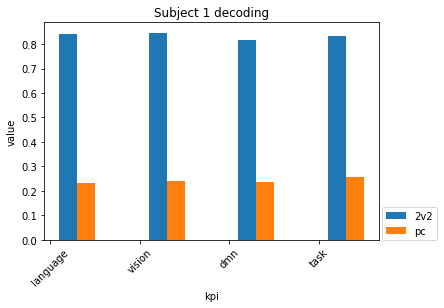

In [25]:
x_axis = np.arange(4)
plt.figure()
w = 0.2
plt.bar(x_axis +w*1,score_dic_d.values() , width=w, label = '2v2')
plt.bar(x_axis +w*2,score_dic_d_p.values() , width=w, label = 'pc')
plt.xticks(x_axis,score_dic_d.keys())
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01,0), loc="lower left", borderaxespad=0)
plt.xlabel('kpi')
plt.ylabel('value')
plt.title('Subject 1 decoding')

Text(0.5, 1.0, 'Subject 1 encoding')

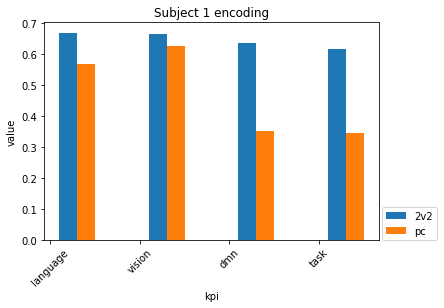

In [29]:
x_axis = np.arange(4)
plt.figure()
w = 0.2
plt.bar(x_axis +w*1,score_dic_e.values() , width=w, label = '2v2')
plt.bar(x_axis +w*2,score_dic_e_p.values() , width=w, label = 'pc')
plt.xticks(x_axis,score_dic_e.keys())
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01,0), loc="lower left", borderaxespad=0)
plt.xlabel('kpi')
plt.ylabel('value')
plt.title('Subject 1 encoding')

Text(0.5, 1.0, 'Subject 2 decoding')

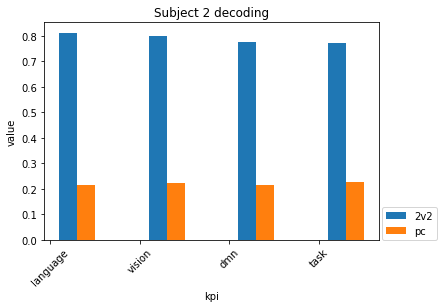

In [30]:
x_axis = np.arange(4)
plt.figure()
w = 0.2
plt.bar(x_axis +w*1,score_dic_d2.values() , width=w, label = '2v2')
plt.bar(x_axis +w*2,score_dic_d2_p.values() , width=w, label = 'pc')
plt.xticks(x_axis,score_dic_d.keys())
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01,0), loc="lower left", borderaxespad=0)
plt.xlabel('kpi')
plt.ylabel('value')
plt.title('Subject 2 decoding')

Text(0.5, 1.0, 'Subject 2 encoding')

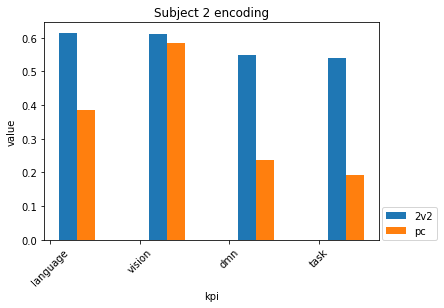

In [32]:
x_axis = np.arange(4)
plt.figure()
w = 0.2
plt.bar(x_axis +w*1,score_dic_e2.values() , width=w, label = '2v2')
plt.bar(x_axis +w*2,score_dic_e2_p.values() , width=w, label = 'pc')
plt.xticks(x_axis,score_dic_e.keys())
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01,0), loc="lower left", borderaxespad=0)
plt.xlabel('kpi')
plt.ylabel('value')
plt.title('Subject 2 encoding')